Collatz cycle notebook

In [1]:
"""
This notebook tries to find the maximum possible beta for a collatz 
sequence. Since the beta is dependent from the alphas of a sequence, 
different vectors of alpha values are created.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz.commons import to_binary


# Helper functions
def _create_rhythmic_alphas(n:int):
    indices = pd.Series(range(1, n + 1))
    mask = indices % 3 != 0
    mask *= 1
    mask += 1
    return mask.astype('int64')


def _create_cycle_alphas(k_factor:int, n:int):
    indices = pd.Series(range(1, n + 1))
    alpha_pred = (log2(k_factor) * indices).astype('int64') + 2
    alpha_next = list(alpha_pred[:-1])
    alpha_next.insert(0, 0)
    alpha_diff = alpha_pred - alpha_next
    return alpha_diff


# Configuration
k = 3
max_n = 201
max_value = 10001
print_table = True
shuffle_alphas = False

# Generate hypothetical sequence
odds_length = int(max_n)
odds_start = rnd.randint(1, max_value)
odds_start = odds_start if odds_start % 2 == 1 else odds_start + 1

odds_start = 1001

# alphas = _create_rhythmic_alphas(odds_length)
alphas = _create_cycle_alphas(k, odds_length)

if shuffle_alphas:
    rnd.shuffle(alphas)

odds = [odds_start]
for i in range(0, max_n):
    next_odd = (odds[i] * k + 1) / 2**alphas[i]
    odds.append(next_odd)

i_series = pd.Series(range(1, odds_length + 1))
odds_series = pd.Series(odds)
betas = (1 + 1 / (k * odds_series)).cumprod()

analysis_frame = pd.DataFrame({
    "i": i_series,
    "odds_start": odds_start
})

analysis_frame["odds"] = odds_series
analysis_frame["binary"] = analysis_frame["odds"].astype('int64').apply(to_binary)
analysis_frame["beta"] = betas
analysis_frame["alpha"] = alphas
analysis_frame["alpha_sum"] = alphas.cumsum()
analysis_frame["valid"] = odds_series % 2 == 1

# Print output
beta_max = 2**(analysis_frame["beta"].max()) * (1 + 1/k)
valid_count = analysis_frame["valid"].sum()

print("First odd:",  analysis_frame["odds"][0], " K:", k, 
      " Beta max:", beta_max, 
      " Valid:", valid_count, 
      "\n")

if print_table:
    print(analysis_frame.to_string(index=False), "\n")

First odd: 1001.0  K: 3  Beta max: 3.0476669726294716  Valid: 1 

   i  odds_start         odds      binary      beta  alpha  alpha_sum  valid
   1        1001  1001.000000  1111101001  1.000333      3          3   True
   2        1001   375.500000   101110111  1.001221      2          5  False
   3        1001   281.875000   100011001  1.002405      1          6  False
   4        1001   423.312500   110100111  1.003194      2          8  False
   5        1001   317.734375   100111101  1.004247      1          9  False
   6        1001   477.101562   111011101  1.004948      2         11  False
   7        1001   358.076172   101100110  1.005884      2         13  False
   8        1001   268.807129   100001100  1.007131      1         14  False
   9        1001   403.710693   110010011  1.007963      2         16  False
  10        1001   303.033020   100101111  1.009072      1         17  False
  11        1001   455.049530   111000111  1.009811      2         19  False
  12      

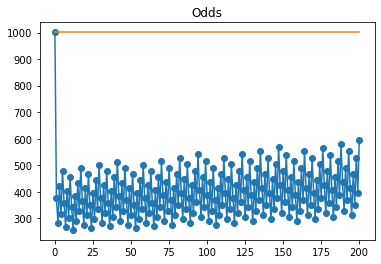

In [2]:
# Plot results
plt.figure()
plt.title("Odds")
plt.plot(analysis_frame["odds"], "-o")
plt.plot(analysis_frame["odds_start"])

plt.show()